In [33]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import datetime
# from pandas import datetools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
from fbprophet import Prophet
from sklearn.preprocessing import Imputer as imp

In [51]:
# Load Dataset

df = pd.read_csv("historical_weather.csv")
point1 = df.loc[df['point'] == 1]
point1
# furniture = df.loc[df['Category'] == 'Furniture']
# furniture

,point,prediction_date,wind_speed_100m,wind_direction_100m,temperature,air_density,pressure,precipitation,wind_gust,radiation,wind_speed,wind_direction
0,1,01/01/2014 12:00,13.6,210.3,9.8,1.17,952.2,0.0,19.4,10.0,7.0,203.7
1,1,01/01/2014 13:00,13.6,210.0,9.8,1.17,951.6,0.0,19.6,16.8,7.0,204.0
2,1,01/01/2014 14:00,13.6,209.8,9.8,1.17,951.1,0.0,19.9,19.9,7.0,204.3
3,1,01/01/2014 15:00,13.6,209.6,9.8,1.17,950.5,0.0,20.1,20.0,7.1,204.6
4,1,01/01/2014 16:00,13.8,218.2,9.9,1.17,950.7,0.0,19.0,17.9,7.1,212.6
5,1,01/01/2014 17:00,14.1,226.9,10.0,1.17,950.8,0.0,17.9,14.3,7.2,220.6
6,1,01/01/2014 18:00,14.3,235.6,10.2,1.17,950.9,0.0,16.8,10.0,7.2,228.6
7,1,01/01/2014 19:00,13.7,239.6,10.1,1.17,951.4,0.0,16.1,5.8,7.0,233.4
8,1,01/01/2014 20:00,13.2,243.7,10.0,1.17,951.8,0.0,15.3,2.3,6.8,238.2
9,1,01/01/2014 21:00,12.7,247.8,10.0,1.17,952.3,0.0,14.6,0.0,6.6,243.0


In [18]:
# print(point1.dtypes)

point1['prediction_date'] = pd.to_datetime(point1['prediction_date'])

print(point1.dtypes)

point                           int64
prediction_date        datetime64[ns]
wind_speed_100m               float64
wind_direction_100m           float64
temperature                   float64
air_density                   float64
pressure                      float64
precipitation                 float64
wind_gust                     float64
radiation                     float64
wind_speed                    float64
wind_direction                float64
dtype: object


In [19]:
point1['prediction_date'].min(), point1['prediction_date'].max()

(Timestamp('2014-01-01 12:00:00'), Timestamp('2015-12-10 23:00:00'))

In [20]:
## PREPROCESSING

#Drop Column not include
cols = ['point']
point1.drop(cols, axis=1, inplace=True)
# 
#Sort by date
# furniture = furniture.sort_values('Order Date')

#Missing Value
point1.isnull().sum()

prediction_date        0
wind_speed_100m        0
wind_direction_100m    0
temperature            0
air_density            0
pressure               0
precipitation          0
wind_gust              0
radiation              0
wind_speed             0
wind_direction         0
dtype: int64

In [21]:
point1 = point1.groupby('prediction_date')['precipitation'].sum().reset_index()
point1.head()

,prediction_date,precipitation
0,2014-01-01 12:00:00,0.0
1,2014-01-01 13:00:00,0.0
2,2014-01-01 14:00:00,0.0
3,2014-01-01 15:00:00,0.0
4,2014-01-01 16:00:00,0.0


In [22]:
#indexing with time series

point1 = point1.set_index('prediction_date')
point1.index

DatetimeIndex(['2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               '2014-01-01 16:00:00', '2014-01-01 17:00:00',
               '2014-01-01 18:00:00', '2014-01-01 19:00:00',
               '2014-01-01 20:00:00', '2014-01-01 21:00:00',
               ...
               '2015-12-10 14:00:00', '2015-12-10 15:00:00',
               '2015-12-10 16:00:00', '2015-12-10 17:00:00',
               '2015-12-10 18:00:00', '2015-12-10 19:00:00',
               '2015-12-10 20:00:00', '2015-12-10 21:00:00',
               '2015-12-10 22:00:00', '2015-12-10 23:00:00'],
              dtype='datetime64[ns]', name='prediction_date', length=15144, freq=None)

In [39]:
# averages daily sales value for that month

y = point1['precipitation'].resample('MS').mean()
# y = y.dropna()
# y.isnull().sum()
y

prediction_date
2014-01-01    0.079592
2014-02-01    0.114286
2014-03-01    0.062903
2014-04-01    0.058333
2014-05-01    0.141935
2014-06-01    0.098333
2014-07-01    0.145161
2014-08-01    0.075806
2014-09-01    0.277586
2014-10-01    0.179661
2014-11-01    0.229825
2014-12-01    0.101667
2015-01-01    0.050877
2015-02-01    0.072000
2015-03-01    0.046429
2015-04-01    0.119149
2015-05-01    0.175472
2015-06-01    0.072549
2015-07-01    0.119298
2015-08-01    0.133333
2015-09-01    0.233929
2015-10-01    0.142424
2015-11-01    0.178947
2015-12-01    0.089474
Freq: MS, Name: precipitation, dtype: float64

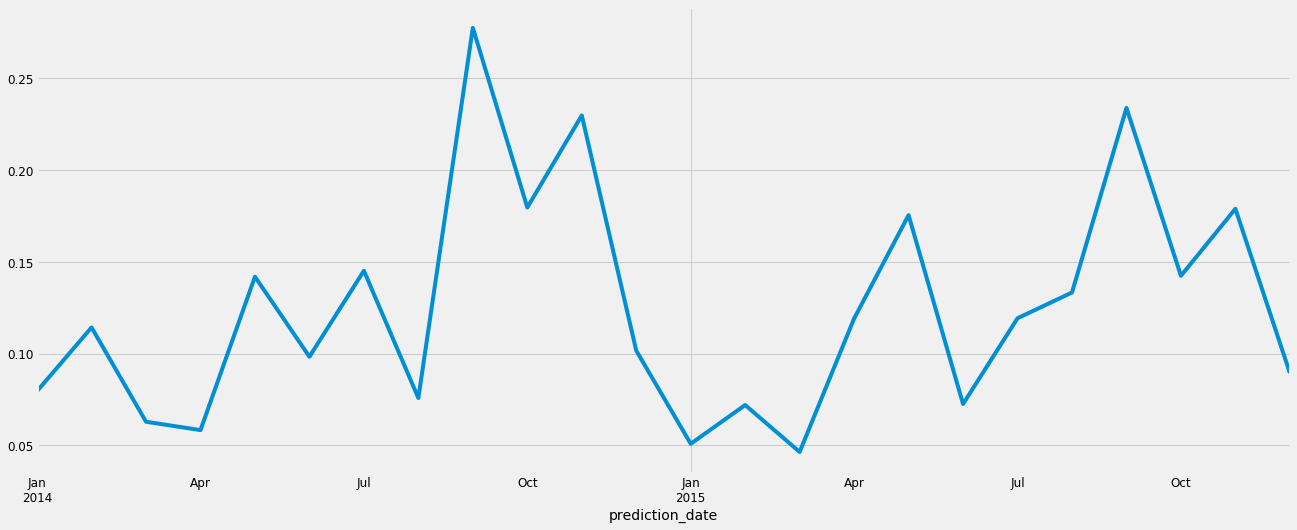

In [40]:
# #Visualizing
y.plot(figsize=(20, 8))
plt.show()


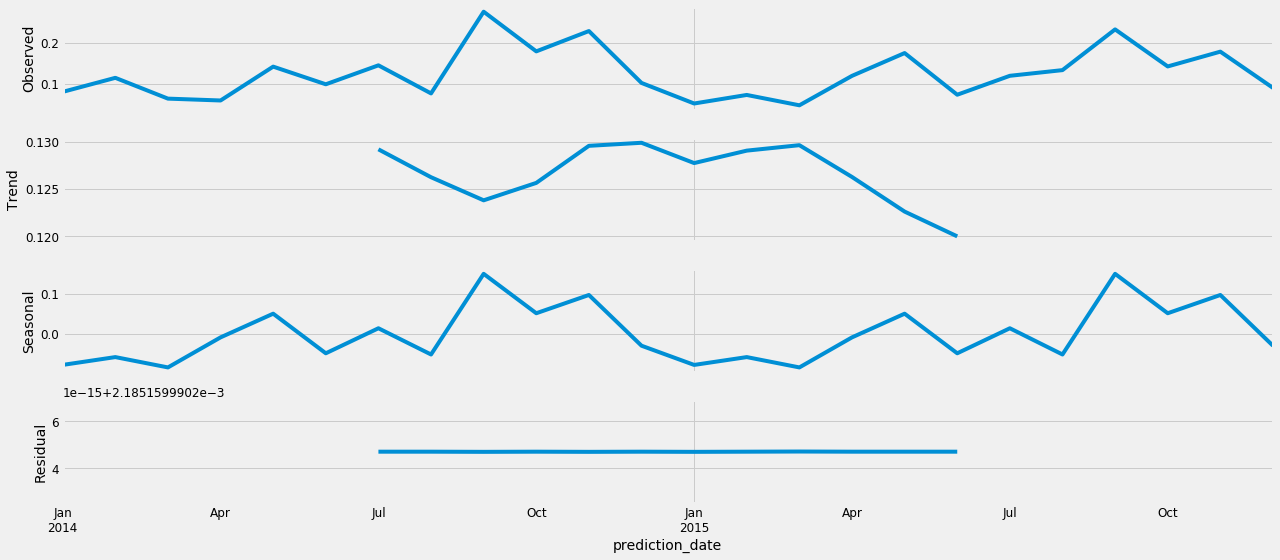

In [41]:
# #VIsualizing using TIME-SERIES DECOMPOSE

rcParams['figure.figsize'] = 18, 8
# df = pd.DataFrame(data=x, index=pd.date_range(start=datetime(2015, 1, 1), periods=length, freq='w'), columns=['value'])
# decomposition = seasonal_decompose(df)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [42]:
#Time series forecasting with ARIMA (process still unknown)
# ARIMA(p, d, q)

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [43]:
# This step is parameter Selection ARIMA Time Series Model. 
# Our goal here is to use a “grid search” to find the optimal set of parameters 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-22.867676805955227
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-37.62646463333897
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-42.997557951726016
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-29.931915886146214
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-32.36272799752047
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-43.23328280934239
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-46.706997017555615
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-27.773164142591096
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-36.13008729403201
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-49.69163841922548
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-25.726501654072596
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-35.562340132702786
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-49.56931457141148
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-35.91769972582351
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-36.82726093035548
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-50.67052137367992
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-30.47547189610063
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-38.

In [44]:
#FItting ARIMA Model
# ARIMA(1, 1, 0)x(0, 0, 0, 12)
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 0),seasonal_order=(0, 0, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:          precipitation   No. Observations:                   24
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  28.030
Date:                Fri, 22 Mar 2019   AIC                            -52.059
Time:                        22:56:04   BIC                            -49.877
Sample:                    01-01-2014   HQIC                           -51.545
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5464      0.206     -2.658      0.008      -0.949      -0.143
sigma2         0.0046      0.001      3.269      0.001       0.002       0.007
Ljung-Box (Q):                       19.26   Jarque-

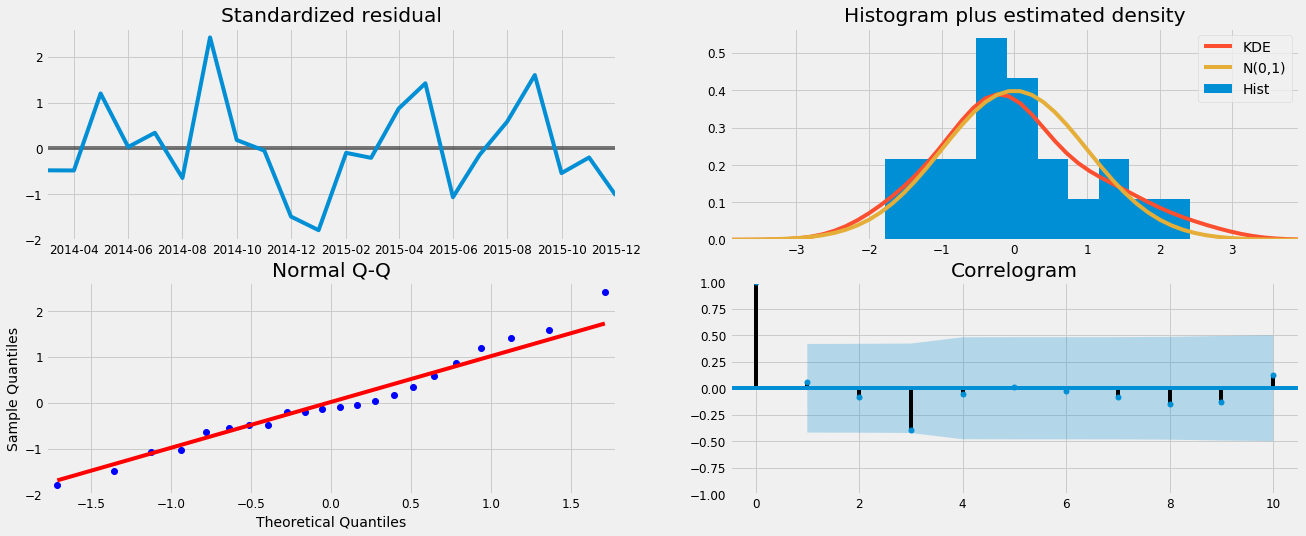

In [45]:
# We should always run model diagnostics to investigate any unusual behavior.

results.plot_diagnostics(figsize=(20, 8))
plt.show()

In [199]:
# # results (Timestamp('2014-01-01 12:00:00'), Timestamp('2015-12-10 23:00:00'))
# start=pd.to_datetime('2017-01-01').dt.floor('d')
# start = pd.to_datetime('2015-01-12')

# date = str(start)[:10]
# date2 = pd.to_datetime(date)
# date

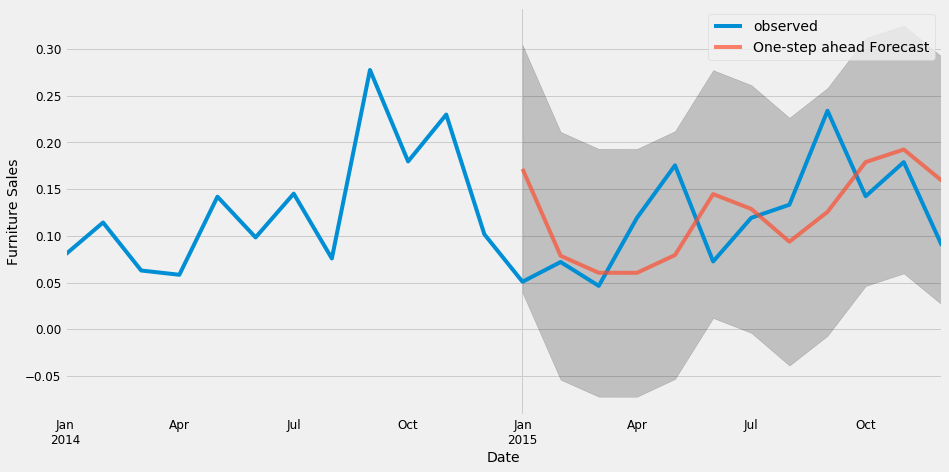

In [49]:
# Validating forecasts

# we compare predicted sales to real sales of the time series, 
# and we set forecasts to start at 2017–01–01 to the end of the data.

pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [50]:
# Mean Square Error

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Root Mean Square Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is nan
The Root Mean Squared Error of our forecasts is nan
